# Data Analysis

Importing libraries 

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
import os
import matplotlib.pyplot as plt
import mibian as mb

Download Bitcoin data from Yahoo Finance for 2 years and save it in "Bitcoin"

In [3]:
Bitcoin = yf.download("BTC-USD", start="2020-11-30", end="2022-11-30")

[*********************100%***********************]  1 of 1 completed


In [4]:
Bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-30,18178.322266,19749.263672,18178.322266,19625.835938,19625.835938,47728480399
2020-12-01,19633.769531,19845.974609,18321.921875,18802.998047,18802.998047,49633658712
2020-12-02,18801.744141,19308.330078,18347.718750,19201.091797,19201.091797,37387697139
2020-12-03,19205.925781,19566.191406,18925.785156,19445.398438,19445.398438,31930317405
2020-12-04,19446.966797,19511.404297,18697.193359,18699.765625,18699.765625,33872388058


In [5]:
Bitcoin.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-25,16602.269531,16603.316406,16388.404297,16521.841797,16521.841797,18678255976
2022-11-26,16521.576172,16666.863281,16416.228516,16464.281250,16464.281250,18000008764
2022-11-27,16463.882812,16594.406250,16437.025391,16444.626953,16444.626953,20443898509
2022-11-28,16440.222656,16482.933594,16054.530273,16217.322266,16217.322266,27743025156
2022-11-29,16217.639648,16522.257812,16139.396484,16444.982422,16444.982422,23581685468


In [6]:
Bitcoin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,38042.831290,39016.658955,36924.546792,38034.461754,38034.461754,3.952849e+10
std,13599.940193,13934.327336,13212.742635,13596.990386,13596.990386,2.106819e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,1.373656e+10
25%,23745.671387,24198.536133,23154.919922,23747.719238,23747.719238,2.701602e+10
50%,38743.265625,39791.955078,37551.917969,38721.625000,38721.625000,3.426749e+10
75%,47800.766602,49188.963867,46749.123047,47765.391602,47765.391602,4.716099e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Rolling Means Data

In [7]:
Bitcoin['SMA30'] = Bitcoin['Adj Close'].rolling(30).mean()

In [8]:
Bitcoin['CMA30'] = Bitcoin['Adj Close'].expanding(30).mean()

In [9]:
Bitcoin['EWMA30'] = Bitcoin['Adj Close'].ewm(span=30).mean()

The movement of Closing Price (adjusted close), simple moving average for 30 days (SMA30), cumulative 30 day moving average (CMA30) and exponential weighted 30 day moving average (EWMA). 

<AxesSubplot:xlabel='Date'>

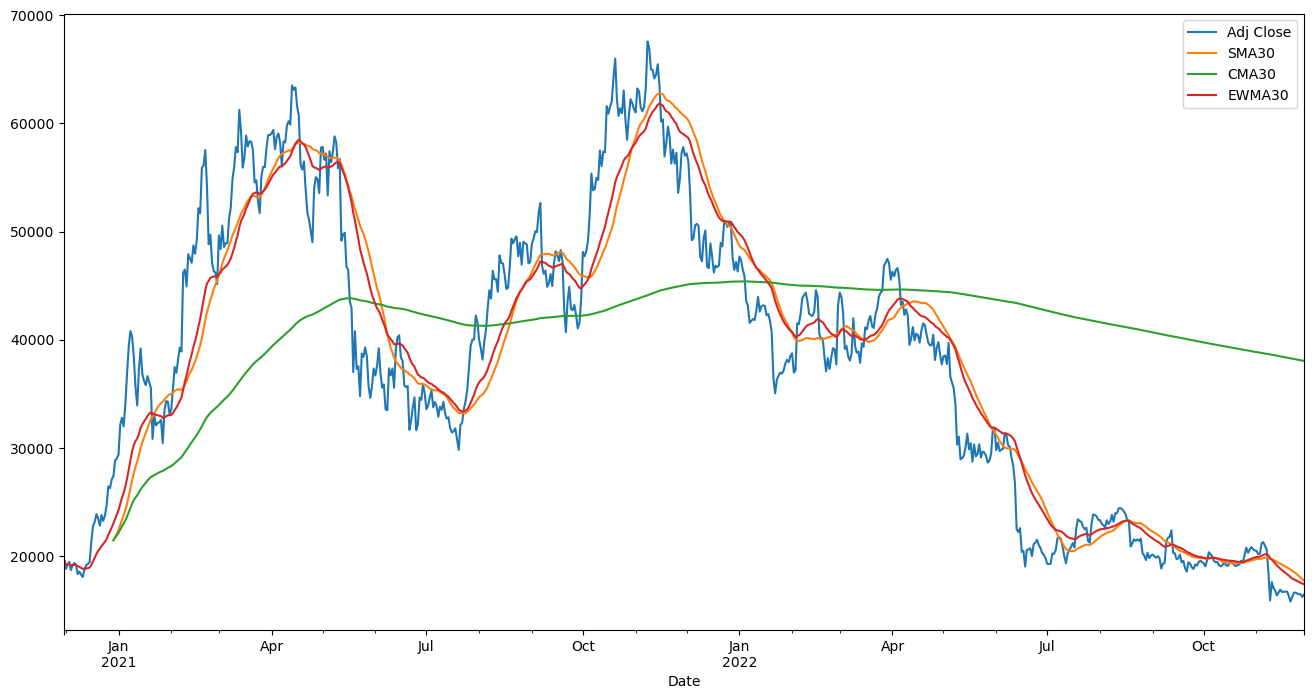

In [10]:
Bitcoin[['Adj Close', 'SMA30', 'CMA30', 'EWMA30']].plot(label='Bitcoin', figsize=(16, 8))

Trim the column of Adjusted Close for computation

In [11]:
Bitcoin_close = Bitcoin['Adj Close']
Bitcoin_close.tail()  # to check the data entry in the table

Date
2022-11-25    16521.841797
2022-11-26    16464.281250
2022-11-27    16444.626953
2022-11-28    16217.322266
2022-11-29    16444.982422
Name: Adj Close, dtype: float64

In [12]:
Bit_log_Ret2Y = np.log(Bitcoin_close/Bitcoin_close.shift(1))   #Computation of Logrithmic Return for 2 years
Avg_ret = float(np.mean(Bit_log_Ret2Y))
Ann_Ret = np.exp(Avg_ret*365)-1
print('The annualised log return for two years is ', Ann_Ret*100, '%')    #Annualised Log Return

The annualised log return for two years is  -8.472847026946495 %


In [13]:
Bit_log_Vol2Y = np.sqrt(356)* Bit_log_Ret2Y.std()  #Annualised Volatility computation (over 365 days)
print ('The annualised volatility of Bitcoin for a period of 1 month is ', round(Bit_log_Vol2Y*100,2), '%.')

The annualised volatility of Bitcoin for a period of 1 month is  72.93 %.


Graph to look at the trend in the Bitcoin Price (in USD)

<AxesSubplot:title={'center':'Bitcoin to USD chart'}, xlabel='Daily data', ylabel='Price in USD'>

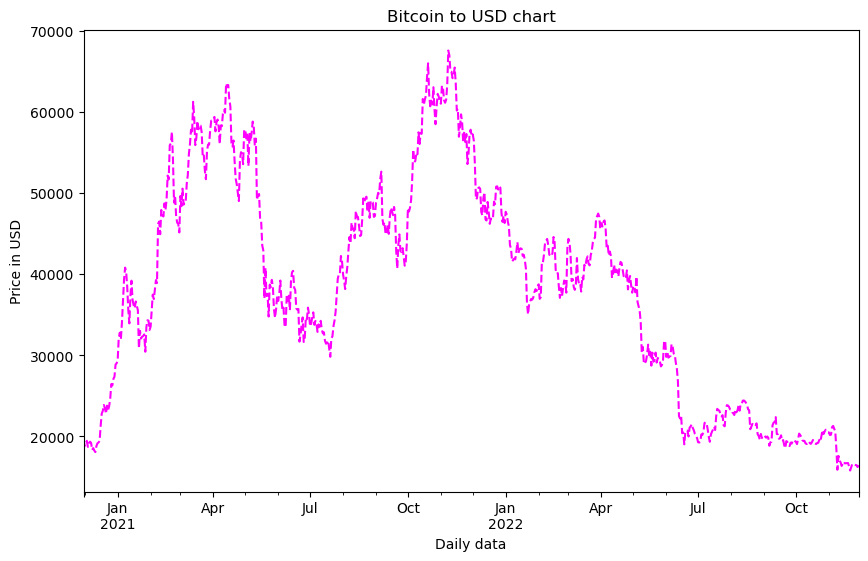

In [14]:
Bitcoin_close.plot(figsize=(10, 6), color = 'magenta', linestyle='dashed', 
                   xlabel='Daily data', ylabel = 'Price in USD', 
                   title = 'Bitcoin to USD chart')

In [15]:
Bitcoin_1M = Bitcoin_close[-32:-1]   #Bitcoin Closing Prices for 1 month
Bitcoin_1M.round(2)

Date
2022-10-29    20818.48
2022-10-30    20635.60
2022-10-31    20495.77
2022-11-01    20485.27
2022-11-02    20159.50
2022-11-03    20209.99
2022-11-04    21147.23
2022-11-05    21282.69
2022-11-06    20926.49
2022-11-07    20602.82
2022-11-08    18541.27
2022-11-09    15880.78
2022-11-10    17586.77
2022-11-11    17034.29
2022-11-12    16799.19
2022-11-13    16353.37
2022-11-14    16618.20
2022-11-15    16884.61
2022-11-16    16669.44
2022-11-17    16687.52
2022-11-18    16697.78
2022-11-19    16711.55
2022-11-20    16291.83
2022-11-21    15787.28
2022-11-22    16189.77
2022-11-23    16610.71
2022-11-24    16604.46
2022-11-25    16521.84
2022-11-26    16464.28
2022-11-27    16444.63
2022-11-28    16217.32
Name: Adj Close, dtype: float64

In [16]:
BTC0 = Bitcoin_1M[-1]  #Last Closing Price of Bitcoin to be used as Spot Price
print('The Spot Price is $',BTC0.round(2))

The Spot Price is $ 16217.32


In [17]:
Bitcoin_1M.describe() 
# To compute the descriptive statistics for Close Price of Bitcoin analysed over one month's time

count       31.000000
mean     17947.120464
std       1982.664744
min      15787.284180
25%      16493.061523
50%      16711.546875
75%      20347.630859
max      21282.691406
Name: Adj Close, dtype: float64

In [20]:
Bit_log_Ret = np.log(Bitcoin_1M/Bitcoin_1M.shift(1))   #Computation of Logrithmic Return
Bit_log_Ret.round(2)

Date
2022-10-29     NaN
2022-10-30   -0.01
2022-10-31   -0.01
2022-11-01   -0.00
2022-11-02   -0.02
2022-11-03    0.00
2022-11-04    0.05
2022-11-05    0.01
2022-11-06   -0.02
2022-11-07   -0.02
2022-11-08   -0.11
2022-11-09   -0.15
2022-11-10    0.10
2022-11-11   -0.03
2022-11-12   -0.01
2022-11-13   -0.03
2022-11-14    0.02
2022-11-15    0.02
2022-11-16   -0.01
2022-11-17    0.00
2022-11-18    0.00
2022-11-19    0.00
2022-11-20   -0.03
2022-11-21   -0.03
2022-11-22    0.03
2022-11-23    0.03
2022-11-24   -0.00
2022-11-25   -0.00
2022-11-26   -0.00
2022-11-27   -0.00
2022-11-28   -0.01
Name: Adj Close, dtype: float64

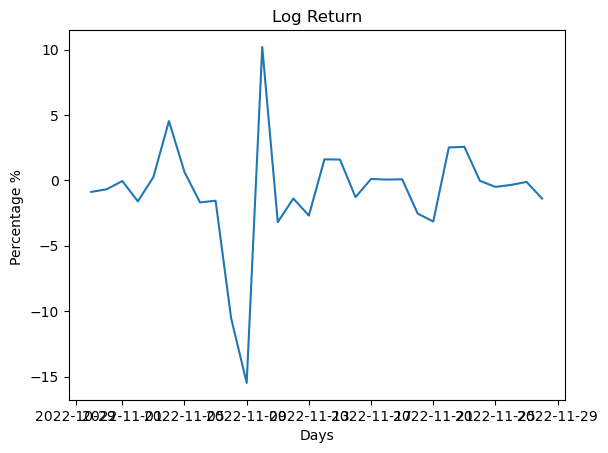

In [21]:
fig = plt.figure()
plt.plot(Bit_log_Ret * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

The clustered volatility is seen near day 9 and day 11 of November 2022. The high changes are followed by high changes.

In [18]:
Avg_ret_1M = float(np.mean(Bit_log_Ret))
Ann_Ret_1M = np.exp(Avg_ret_1M*365)-1
print('The annualised log return for two years is ', Ann_Ret_1M*100, '%')    #Annualised Log Return for 1-Month

The annualised log return for two years is  -95.21056688092563 %


In [19]:
Bit_Vol = np.sqrt(356)* Bit_log_Ret.std()  #Annualised Volatility computation for 1-month period
print ('The annualised volatility of Bitcoin for a period of 1 month is ', round(Bit_Vol*100,2), '%.')

The annualised volatility of Bitcoin for a period of 1 month is  80.07 %.


# Binomial Tree & Computation of Put Option Price using the binomial tree

Defining the factors

In [20]:
S0 = BTC0               # spot stock price
K = 17200               # strick price is as $17,200
T = 1/12                # maturity is set at 1 month
r = 3.68/100            # risk free rate for 10 year US Treasury Nov 25 2022
sig = Bit_Vol           # diffusion coefficient or volatility as computed above
N = 4                   # number of periods or number of time steps  
payoff = "put"          # payoff

Computation of factors up and down

In [21]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 
print(u.round(2),d.round(2))

1.12 0.89


Compuation of the Binomial Tree

In [22]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [23]:
S

array([[16217.32226562, 18204.13829205, 20434.36305502, 22937.81703729,
        25747.97408753],
       [    0.        , 14447.34912731, 16217.32226563, 18204.13829205,
        20434.36305502],
       [    0.        ,     0.        , 12870.55244927, 14447.34912731,
        16217.32226563],
       [    0.        ,     0.        ,     0.        , 11465.84877888,
        12870.55244927],
       [    0.        ,     0.        ,     0.        ,     0.        ,
        10214.4557305 ]])

In [24]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
print ('Probalibilty of up is', p.round(2), '; Probability of down is ', q.round(2))                     

Probalibilty of up is 0.47 ; Probability of down is  0.53


Price computation of European Put Option using Binomial Tree

In [25]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
         982.67773437],
       [   0.        ,    0.        ,    0.        ,    0.        ,
        4329.44755073],
       [   0.        ,    0.        ,    0.        ,    0.        ,
        6985.5442695 ]])

In [26]:
# Computation of European Put Option price
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[2085.76657378, 1012.44470329,  271.00178366,    0.        ,
           0.        ],
       [   0.        , 3057.77429857, 1683.27538234,  516.04982199,
           0.        ],
       [   0.        ,    0.        , 4303.09442662, 2739.46925962,
         982.67773437],
       [   0.        ,    0.        ,    0.        , 5720.96960805,
        4329.44755073],
       [   0.        ,    0.        ,    0.        ,    0.        ,
        6985.5442695 ]])

In [27]:
print('European ' + payoff, '$', str( V[0,0]))

European put $ 2085.766573778245


# Monte Carlo Simulation for Option Pricing (Put Option)

In [28]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - Bit_Vol ** 2 / 2) * dt + Bit_Vol * np.sqrt(dt) * rn[t]) 
    return S

In [29]:
Bit_Sim = mcs_simulation_np(10000)  #simulated for 10,000 times

In [30]:
Bit_Sim = np.transpose(Bit_Sim)
Bit_Sim

array([[16217.32226562, 16154.17051151, 16153.83888653, ...,
        15108.49445767, 15171.26940157, 15203.88904412],
       [16217.32226562, 16172.05921774, 16166.6895035 , ...,
        21466.80794771, 21459.09735124, 21403.36168024],
       [16217.32226562, 16231.81544967, 16201.3624497 , ...,
         9428.90139113,  9438.84874987,  9454.08072463],
       ...,
       [16217.32226562, 16186.37032071, 16188.83703194, ...,
        13733.88812851, 13799.13257593, 13778.71015954],
       [16217.32226562, 16224.69962496, 16218.56459652, ...,
        13176.49963004, 13180.82786221, 13171.78022927],
       [16217.32226562, 16252.97508315, 16243.47294703, ...,
        19227.36629167, 19255.9349906 , 19337.5360574 ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

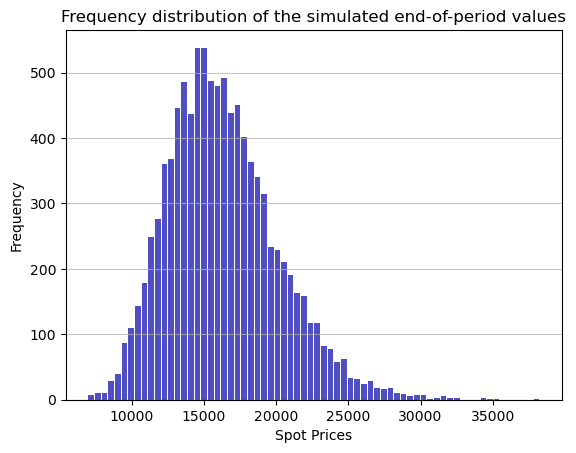

In [31]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=Bit_Sim[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Spot Prices')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [32]:
p = np.mean(np.maximum(K - Bit_Sim[:,-1],0)).round(4)  #Computation of Option price with MS.
print('The European put option price calculated using Monte Carlo simulation is $', str(p))

The European put option price calculated using Monte Carlo simulation is $ 2018.4672


# Black Scholes Model for European Put Option

In [33]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [34]:
put_bit = euro_option_bs(BTC0, K, T, r, Bit_Vol, "put")
print('The BS European Put price is $', round(put_bit, 2))

The BS European Put price is $ 2044.12


In [ ]:
# The Strike is changing from $14,500 to $16,000 and the time is changing from 1 day to 29 days

In [35]:
K_1 = np.linspace(14500,16500,8)
T_1 = [1/365, 5/365, 9/365, 13/365, 17/365, 21/365, 25/365, 29/365]

In [36]:
put_bit = np.zeros((len(T_1),len(K_1)))
for i in range(len(T_1)):
    for j in range(len(K_1)):
        put_bit[i,j] = euro_option_bs(BTC0, K_1[j], T_1[i], r, Bit_Vol, 'put')

In [37]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

strike, ttm = np.meshgrid(K_1, T_1)

/var/folders/qd/vxt8prr90g51qjb_hszsw4qm0000gn/T/ipykernel_3300/723404681.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


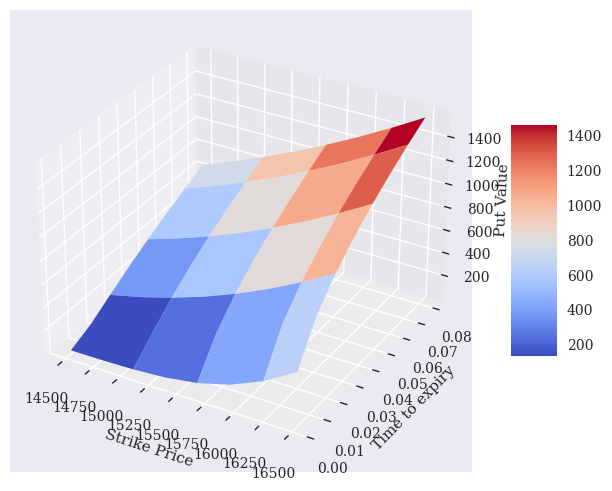

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, put_bit, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to expiry')
ax.set_zlabel('Put Value')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Mibian Black Scholes (without dividend)

In [39]:
option_16200 = mb.BS([BTC0, K, r*100, 30], volatility = Bit_Vol*100).putPrice
BSM_put = option_16200
print('The BS European Put price computed using Mibian is $', round(BSM_put, 2))

The BS European Put price computed using Mibian is $ 2034.38


In [40]:
S = np.linspace (10000, 25000, 100)
BTC_bsm_put = np.zeros((len(S),1))
for i in range(len(S)):
    BTC_bsm_put [i] = mb.BS([S[i], K, r*100, 30], volatility = Bit_Vol*100).putPrice

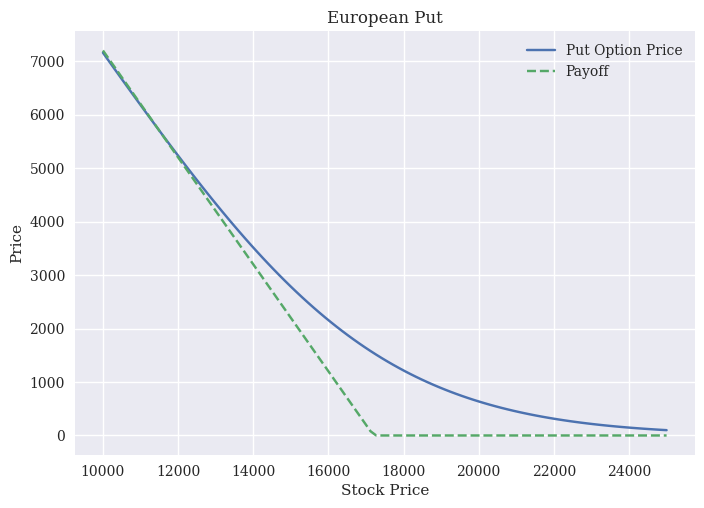

In [41]:
fig = plt.figure()
plt.plot(S, BTC_bsm_put, '-')
plt.plot(S, np.maximum(K-S,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Put')
plt.legend(['Put Option Price','Payoff'])

# Option Greeks

# Delta

In [42]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [43]:
Del = delta(BTC0, K, T, r, q, Bit_Vol, 'put').round(4)
print('The value of Delta is', Del.round(4),'.','If the stock price increases by $1, then the value of the option will decrease by $', -(Del.round(4)), '.')

The value of Delta is -0.597 . If the stock price increases by $1, then the value of the option will decrease by $ 0.597 .


Delta Line Graph (2D)

In [44]:
S = np.linspace(7500,25000,100)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], K, T, r, 0, Bit_Vol, 'put')

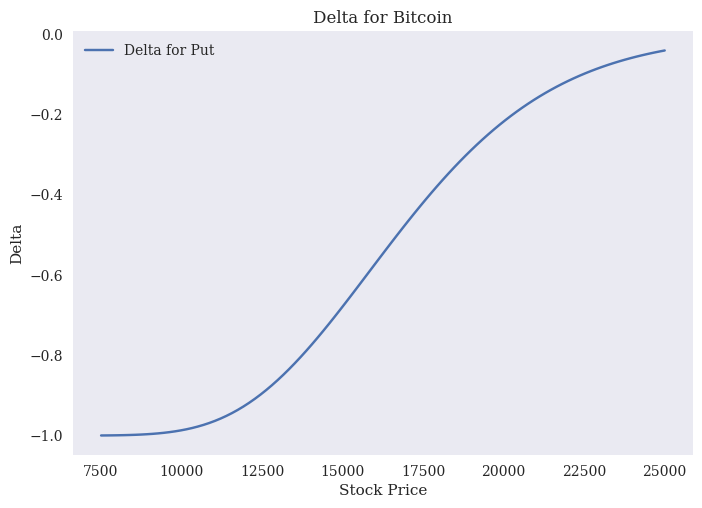

In [45]:
fig = plt.figure()
plt.plot(S, Delta_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta for Bitcoin')
plt.legend(['Delta for Put'])

Delta 3-D Graph

In [46]:
S = np.linspace(10000,25000,100)
Tn = np.linspace(1/365, 1/12, 10)
Delta_Put_3D = np.zeros((len(Tn),len(S)))
for j in range(len(S)):
    for i in range(len(Tn)):
        Delta_Put_3D[i,j] = delta(S[j], K, Tn[i], r, q, Bit_Vol, 'put')

/var/folders/qd/vxt8prr90g51qjb_hszsw4qm0000gn/T/ipykernel_3300/3631358161.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


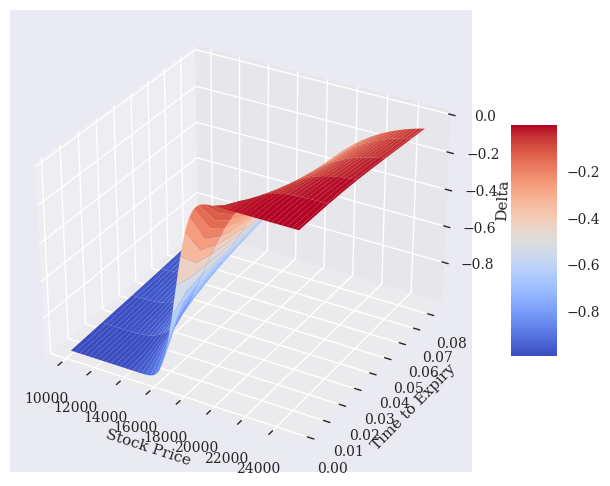

In [47]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, Tn = np.meshgrid(S, Tn)
surf = ax.plot_surface(S, Tn, Delta_Put_3D, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma

In [48]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [49]:
Gam = gamma(BTC0, K, T, r, q, Bit_Vol, 'put')
print('The value of Gamma is', Gam.round(4),'.','If the stock price increases by $1, then the delta will increase by', (Gam.round(4)), '.')

The value of Gamma is 0.0001 . If the stock price increases by $1, then the delta will increase by 0.0001 .


Gamma Line Graph (2D) 

In [50]:
S = np.linspace(7500,25000,100)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], K, T, r, q, Bit_Vol, 'put')

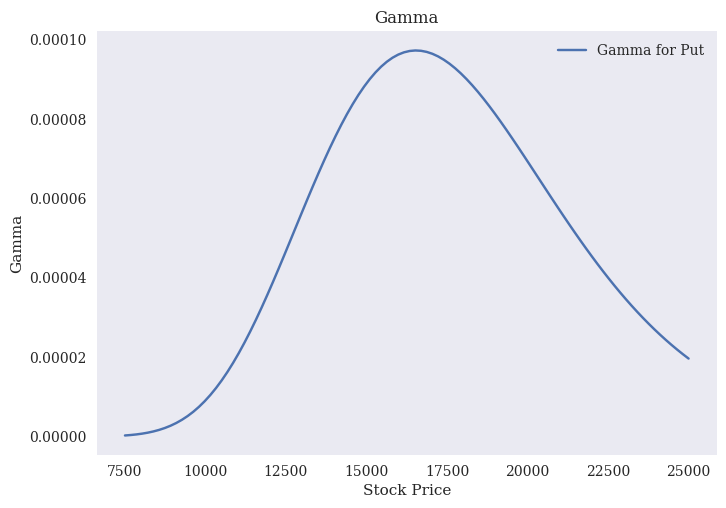

In [51]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

Gamma 3-D Graph

In [52]:
S = np.linspace(12500,20000,100)
T = np.linspace(1/365, 20/365, 10)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], K, T[i], 3.68/100, 0, Bit_Vol, 'put')

/var/folders/qd/vxt8prr90g51qjb_hszsw4qm0000gn/T/ipykernel_3300/3848859912.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


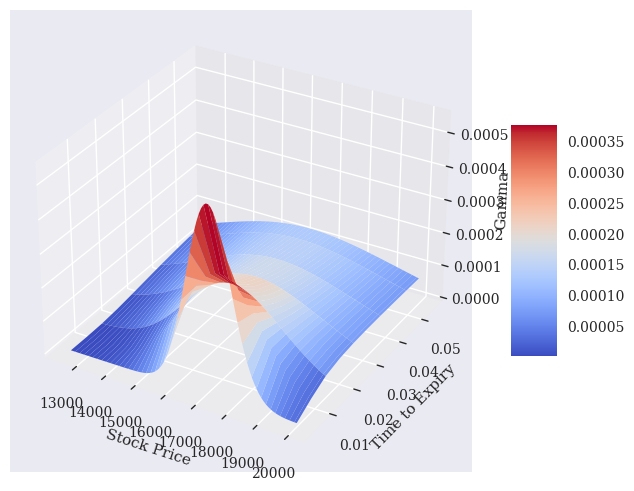

In [53]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed

In [54]:
S0 = BTC0               # spot stock price
K = 17200               # strike is taken at $17,200
T = 1/12                # maturity 
r = 3.68/100            # risk free rate for 10 year US Treasury Nov 25 2022
sig = Bit_Vol           # diffusion coefficient or volatility
q = 0                   # dividend payout. it zero '0' in this case  
payoff = "put"          # payoff

In [55]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [56]:
Spe = speed(BTC0, K, T, r, q, Bit_Vol, 'put')
print('The value of Speed is', Spe.round(4),'.','If the stock price increases by $1, then the gamma will decrease by', -(Gam.round(4)), '.')

The value of Speed is -0.0 . If the stock price increases by $1, then the gamma will decrease by -0.0001 .


Speed Line Graph (2D)

In [57]:
S = np.linspace(7000,25000,100)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], K, T, r, q, Bit_Vol, 'put')

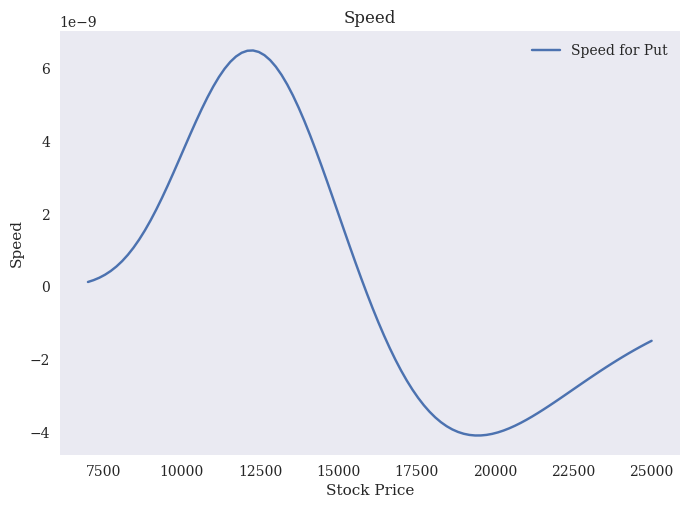

In [58]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

Speed 3D Graph

In [59]:
S = np.linspace(12500,20000,100)
T = np.linspace(1/365, 1/12, 25)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], K, T[i], r, q, Bit_Vol, 'put')

/var/folders/qd/vxt8prr90g51qjb_hszsw4qm0000gn/T/ipykernel_3300/1603304871.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


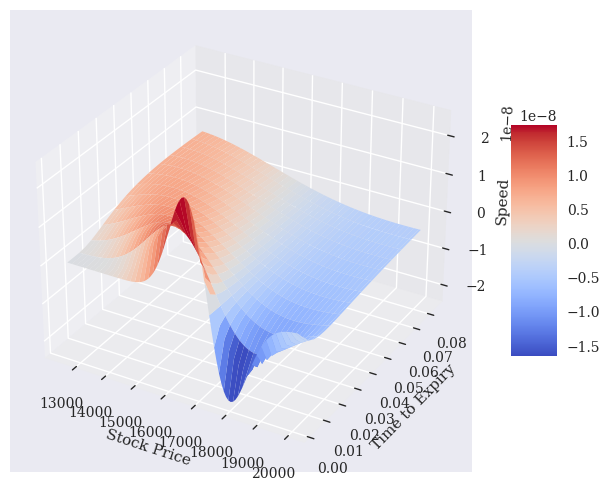

In [60]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

In [61]:
S0 = BTC0               # spot stock price
K = 17200               # strike
T = 1/12                # maturity 
r = 3.68/100            # risk free rate for 10 year US Treasury Nov 25 2022
sig = Bit_Vol           # diffusion coefficient or volatility
q = 0                   # dividend payout. it zero '0' in this case  
payoff = "put"          # payoff

In [62]:
def theta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [63]:
Thet = theta(BTC0, K, T, r, Bit_Vol, 'put')
Thet_1D = Thet/365
print('The value of Theta is', Thet.round(4),'.','If the time increases by 1 day, then the put option price will increase by $', (Thet_1D.round(4)), '.')

The value of Theta is 8498.4107 . If the time increases by 1 day, then the put option price will increase by $ 23.2833 .


Theta Line Graph (2D)

In [64]:
T = np.linspace(0.01,3,20)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(BTC0, K, T[i], r, Bit_Vol, 'put')

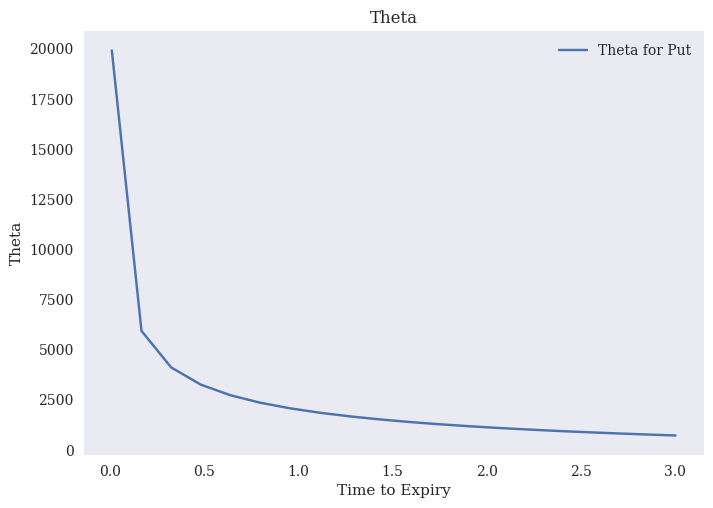

In [65]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

Theta 3-D Plot

In [66]:
S = np.linspace(12500,20000,100)
T = np.linspace(1/365, 1/12, 25)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], K, T[i], r, Bit_Vol, 'put')

/var/folders/qd/vxt8prr90g51qjb_hszsw4qm0000gn/T/ipykernel_3300/383283098.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


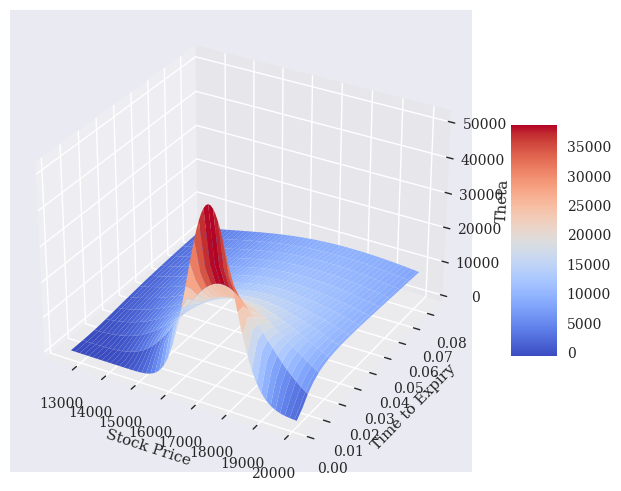

In [67]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega

In [125]:
S0 = BTC0               # spot stock price
K = 17200               # strike
T = 1/12                # maturity 
r = 3.68/100            # risk free rate for 10 year US Treasury Nov 25 2022
sig = Bit_Vol           # diffusion coefficient or volatility
q = 0                   # dividend payout. it zero '0' in this case  
payoff = "put"          # payoff

In [126]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [127]:
Veg = vega(BTC0, K, T, r, q, Bit_Vol, 'put')
Veg_1percent = Veg/100
print('The value of Vega is', Veg.round(4),'.','If the volatility increases by 1%, then the put option price will increase by $', (Veg_1percent.round(4)), '.')

The value of Vega is 1852.9701 . If the volatility increases by 1%, then the put option price will increase by $ 18.5297 .


Vega Line Chart (2D)

In [128]:
vol = np.linspace(0.07,1.2,10)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(BTC0, K, T, r, q, vol[i], 'put')

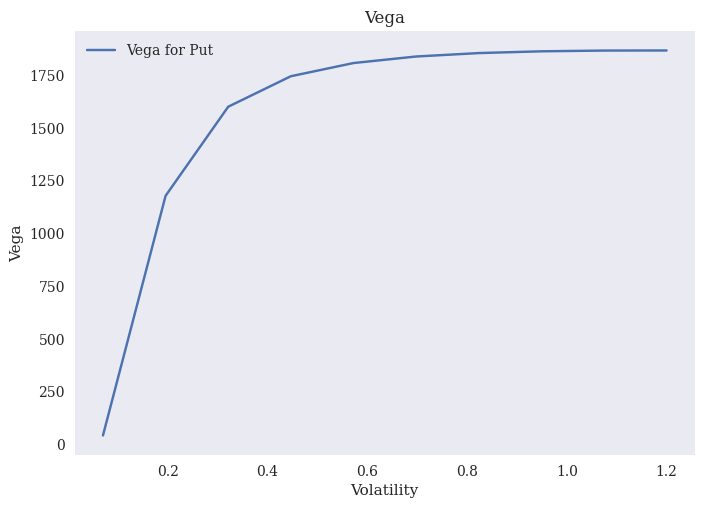

In [129]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

Vega 3-D Plot

In [130]:
from mpl_toolkits.mplot3d import Axes3D

In [131]:
S = np.linspace(12500,20000,100)
T = np.linspace(1/365, 1/12, 25)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], K, T[i], r, q, Bit_Vol, 'put')

/var/folders/qd/vxt8prr90g51qjb_hszsw4qm0000gn/T/ipykernel_3300/2704700163.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


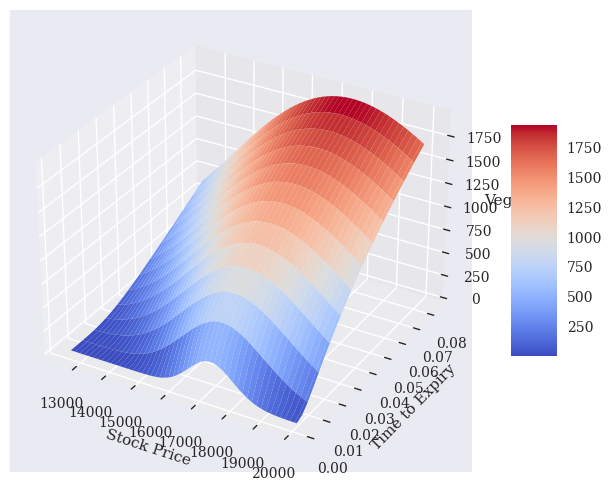

In [132]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho

In [68]:
S0 = BTC0               # spot stock price
K = 17200               # strike
T = 1/12                # maturity 
r = 3.68/100            # risk free rate for 10 year US Treasury Nov 25 2022
sig = Bit_Vol           # diffusion coefficient or volatility
q = 0                   # dividend payout. it zero '0' in this case  
payoff = "put"          # payoff

In [69]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [70]:
Rho = rho(BTC0, K, T, r, q, Bit_Vol, 'put')
rho_1percent = Rho/100
print('The value of rho is', Rho.round(4),'.','If the risk free rate increases by 1%, then the put option price will decrease by $', -(rho_1percent.round(4)), '.')

The value of rho is -913.6493 . If the risk free rate increases by 1%, then the put option price will decrease by $ 9.1365 .


Rho line chart (2D)

In [71]:
r = np.linspace(0.01,0.05,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(BTC0, K, T, r[i], q, Bit_Vol, 'put')

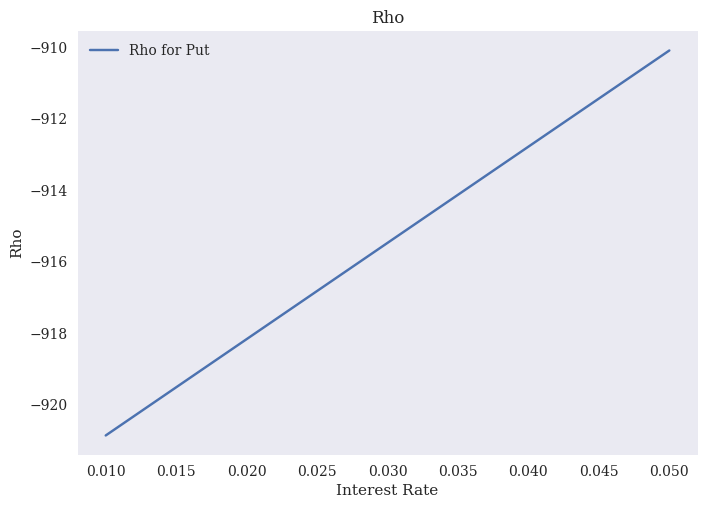

In [72]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

Rho 3D Chart

In [73]:
from mpl_toolkits.mplot3d import Axes3D

In [118]:
S0 = BTC0               # spot stock price
K = 17200               # strike
T = 1/12                # maturity 
r = 3.68/100            # risk free rate for 10 year US Treasury Nov 25 2022
sig = Bit_Vol           # diffusion coefficient or volatility
q = 0                   # dividend payout. it zero '0' in this case  
payoff = "put"          # payoff

In [123]:
S = np.linspace(7500, 20000, 51)
T = np.linspace(1/365, 5, 50)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], K, T[i], r, Bit_Vol, q, 'put')

/var/folders/qd/vxt8prr90g51qjb_hszsw4qm0000gn/T/ipykernel_3300/3057244668.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
/var/folders/qd/vxt8prr90g51qjb_hszsw4qm0000gn/T/ipykernel_3300/3057244668.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))


/var/folders/qd/vxt8prr90g51qjb_hszsw4qm0000gn/T/ipykernel_3300/2235945349.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


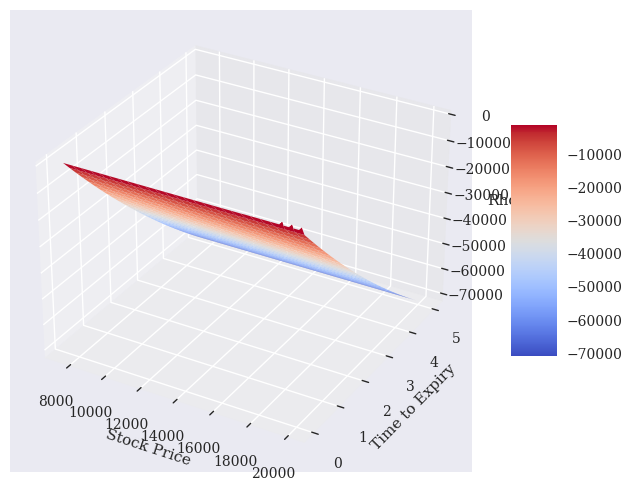

In [124]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);